In [7]:
from quant_invest_lab.data_provider import download_crypto_historical_data
from scipy.signal import stft
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import numpy as np

In [5]:
SYMBOL = "BTC-USDT"
TIMEFRAME = "1day"
df = download_crypto_historical_data(SYMBOL,TIMEFRAME)
df

Open         Close          High           Low  \
Date                                                                          
2017-10-19 02:00:00   3812.004225   5137.927269   5693.210514   3806.381676   
2017-10-20 02:00:00   5137.927269   5698.297439   5998.207831   5137.927269   
2017-10-21 02:00:00   5698.297439   5985.000000   6660.000000   5692.000000   
2017-10-22 02:00:00   5985.000000   6500.000000   6660.000000   5692.000000   
2017-10-23 02:00:00   6229.650000   6150.000000   6500.000000   5692.000000   
...                           ...           ...           ...           ...   
2023-08-28 02:00:00  26101.400000  26120.400000  26250.500000  25865.700000   
2023-08-29 02:00:00  26119.600000  27715.800000  28148.800000  25923.700000   
2023-08-30 02:00:00  27715.700000  27301.000000  27763.300000  27018.000000   
2023-08-31 02:00:00  27301.100000  25940.400000  27578.800000  25668.200000   
2023-09-01 02:00:00  25940.400000  25925.500000  26155.800000  25876.000000   

                          Amount        Volume   Returns  
Date                                                      
2017-10-19 02:00:00     2.824693  1.470084e+04  0.000000  
2017-10-20 02:00:00     3.455172  1.965669e+04  0.109065  
2017-10-21 02:00:00     0.638032  3.826886e+03  0.050314  
2017-10-22 02:00:00     1.873153  1.139524e+04  0.086048  
2017-10-23 02:00:00     2.809644  1.695834e+04 -0.053846  
...                          ...           ...       ...  
2023-08-28 02:00:00  2057.830189  5.359038e+07  0.000728  
2023-08-29 02:00:00  7250.962265  1.975291e+08  0.061079  
2023-08-30 02:00:00  2290.648844  6.254672e+07 -0.014966  
2023-08-31 02:00:00  3849.960984  1.026073e+08 -0.049837  
2023-09-01 02:00:00  1062.086783  2.763478e+07 -0.000574  

[2137 rows x 7 columns]

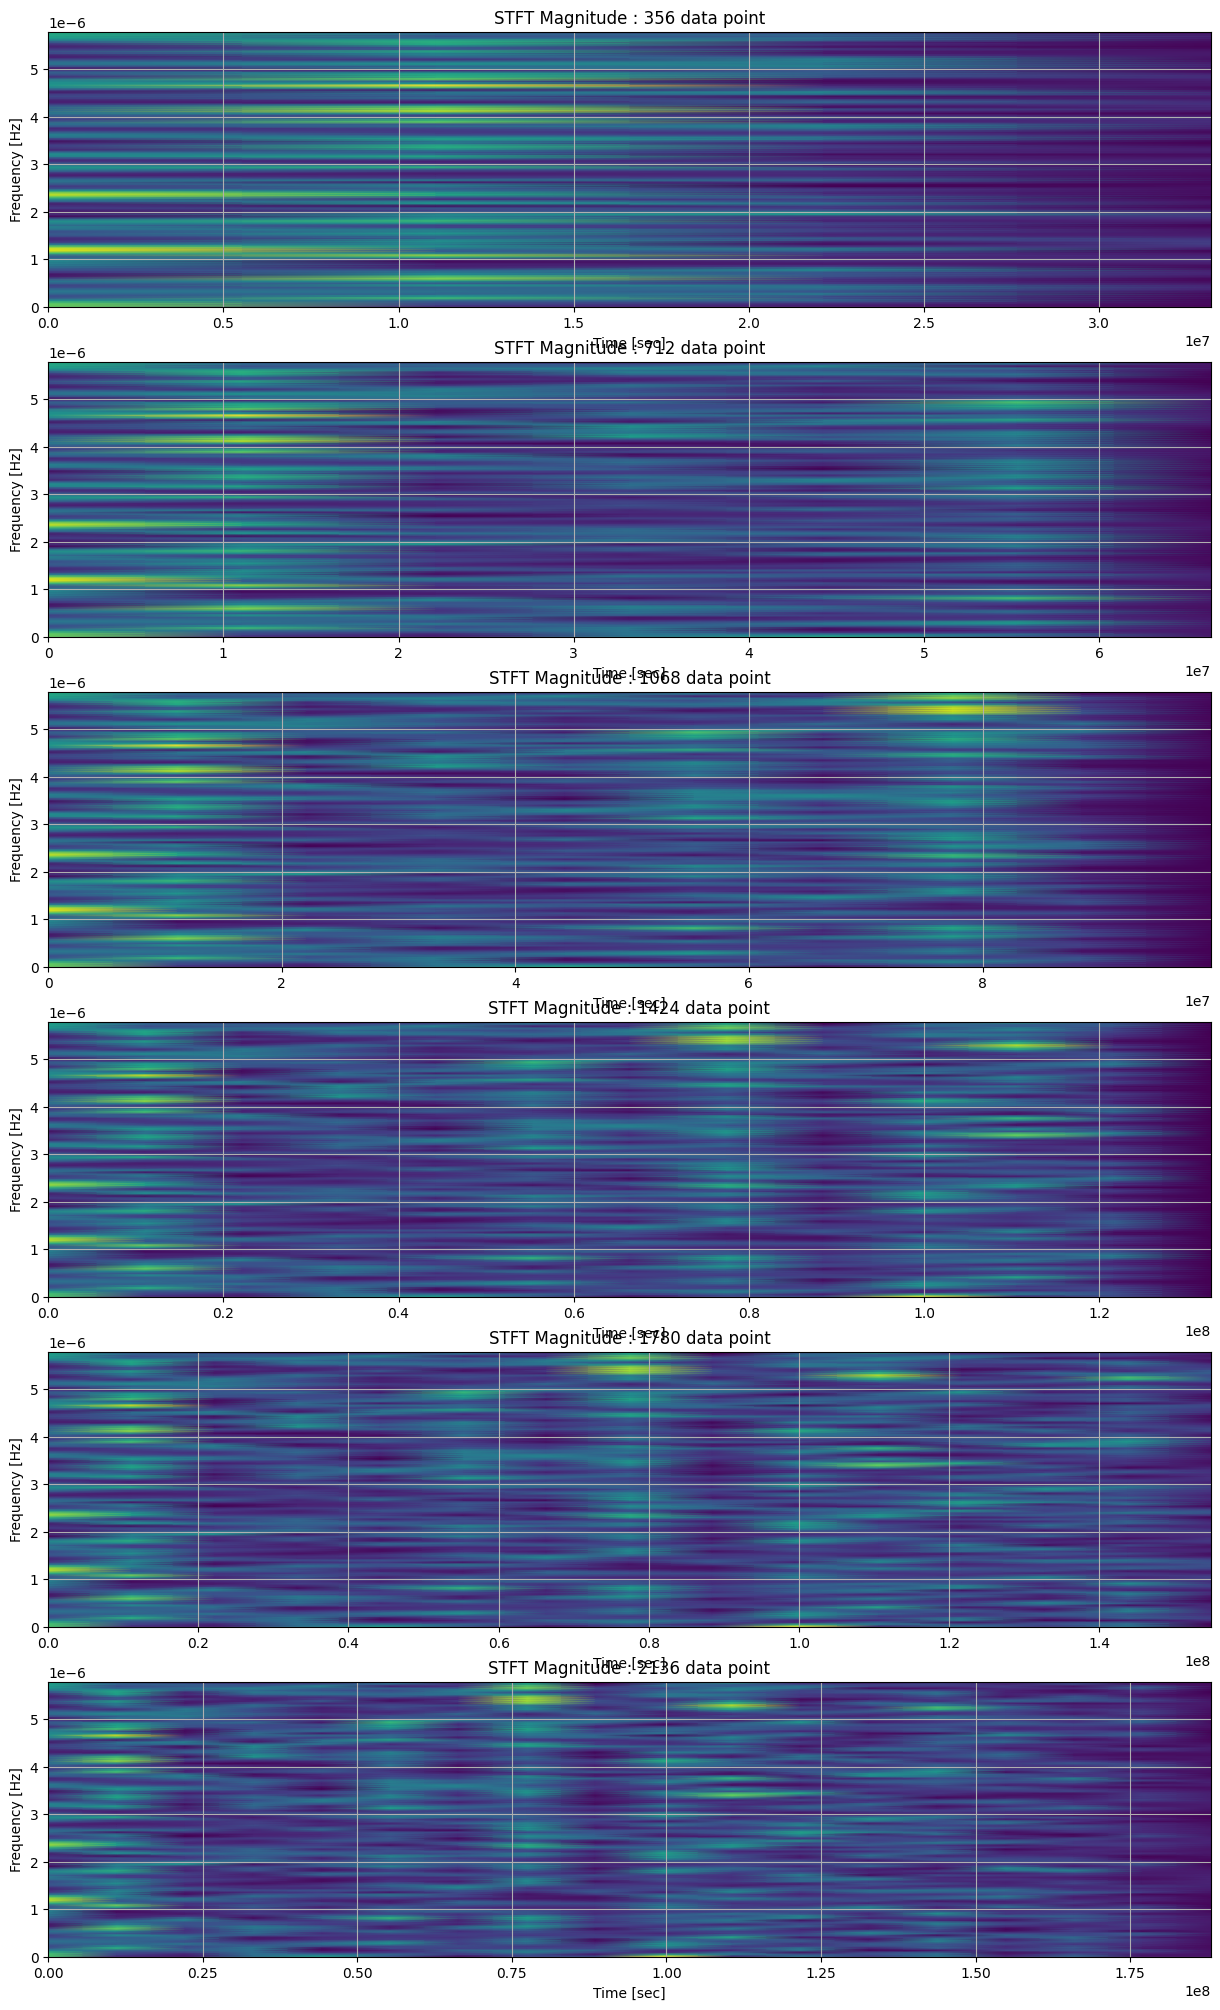

In [8]:

# short time fourier transform
K = 6
POINTS = df.shape[0] // K
Fs = 1 / 24 / 3600

fig, ax = plt.subplots(K, 1, figsize=(15, 25))
for i in range(K):
    fft = stft(
        df["Close"]
        .pct_change()
        .fillna(0.0)
        .to_numpy()[: (i + 1) * POINTS],
        Fs,
        window="hann",
        padded=True,
    )
    # plotting time freq analysis
    ax[i].pcolormesh(fft[1], fft[0], np.abs(fft[2]), shading="gouraud")
    ax[i].set_ylabel("Frequency [Hz]")
    ax[i].set_xlabel("Time [sec]")
    ax[i].grid()
    ax[i].title.set_text(f"STFT Magnitude : {(i+1)*POINTS} data point")



In [9]:


# Create figure and add 3D surface plot
fig = go.Figure(data=[go.Surface(x=fft[1], y=fft[0], z=np.abs(fft[2]))])

# Set axis titles
fig.update_layout(
    scene=dict(
        xaxis_title="Time [sec]",
        yaxis_title="Frequency [Hz]",
        zaxis_title="STFT Magnitude",
    ),
    height=600,
)

# Show plot
fig.show()
